In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA 
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error as mse

In [3]:
X = pd.read_csv("../data/processed/gw_stage.CSV",
                    parse_dates=['Datetime'],
                    index_col=['Datetime'])
y = pd.read_csv("../data/processed/spring.CSV",
                    parse_dates=['datetime'],
                    index_col=['datetime'])
X.drop(X.columns[[8,9,10,11,12,13, 14,15, 25, 61]], axis=1, inplace=True)


In [3]:
import csv

with open('../data/processed/NameKey.csv') as f:
    next(f)  # Skip the header
    reader = csv.reader(f, skipinitialspace=True)
    NameKey = dict(reader)
    print(NameKey)

{'0': 'USGS-LESTER LEWIS/S788', '1': 'NWFWMD-BIKE TRAIL / NITRATE POT. MAP/S795', '2': 'NWFWMD-BRADFORD BROOK DEEP/S793', '3': 'NWFWMD-BRADFORD BROOK SHALLOW', '4': 'TOM BROWN TEST/S791', '5': 'USGS-OLSON RD./S677', '6': 'NWFWMD-HQ FLORIDAN OBS/S704', '7': 'USGS-LAKE JACKSON INTERMEDIATE/S706', '8': 'NWFWMD-NITRATE #1', '9': 'NWFWMD-NITRATE #2/S790', '10': 'NWFWMD-NITRATE #4/S782', '11': 'NWFWMD-NITRATE #5/S796', '12': 'NWFWMD-NITRATE #6/S797', '13': 'WAKULLA CORRECTIONAL INSTITUTE #1/S779', '14': 'WAKULLA CONDUIT WELL@WEST OF HWY 61', '15': 'FGS - SULLIVAN SINK #1', '16': 'NWFWMD GW-2F-LZ (FT BRADEN)/S802', '17': 'NWFWMD GW-3F-LZ (ANF FR-305)', '18': 'NWFWMD GW-4F-UZ (HWY27 DOT)', '19': 'NWFWMD GW-5F (LEON CTY VFD)/S814', '20': 'NWFWMD GW-6F (MICC GREENWAY)/S816', '21': 'NWFWMD GW-7F (LEON CR-59)/S818', '22': 'NWFWMD GW-5S (LEON CTY VFD)', '23': 'NWFWMD GW-7S (LEON CR-59)', '24': 'NWFWMD GW-4F-LZ (HWY27 DOT)/S812', '25': 'NWFWMD GW-12F (RIVERSPRINGS MS)/S820', '26': 'NWFWMD GW-2S (FT 

In [4]:
mm=MinMaxScaler()
ss=StandardScaler()
X_ss=ss.fit_transform(X)
y_mm=mm.fit_transform(y)

X_train=X_ss[:880,:]
X_test=X_ss[880:,:]
y_train=y_mm[:880,0]
y_test=y_mm[880:,0]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(880, 66)
(880,)
(221, 66)
(221,)


In [21]:
#Test of RF model
model=RandomForestRegressor()
model.fit(X_train, y_train)

print("Train Set R2:", model.score(X_train, y_train))
print("Test Set R2:", model.score(X_test, y_test))

Train Set R2: 0.9889715664555914
Test Set R2: -0.3135354255496945


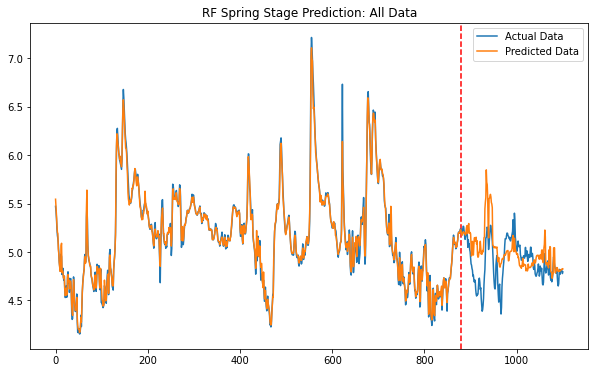

In [25]:
predict=model.predict(X_ss)
z=np.reshape(predict,(1101,1))

predicted_stage=mm.inverse_transform(z)
actual_stage=mm.inverse_transform(y_mm)

plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=880, c='r', linestyle='--') #size of the training set

plt.plot(actual_stage, label='Actual Data') #actual plot
plt.plot(predicted_stage, label='Predicted Data') #predicted plot
plt.title('RF Spring Stage Prediction: All Data')
plt.legend()
plt.show() 

In [26]:
predict=model.predict(X_test)
z=np.reshape(predict,(221,1))

predictTest=mm.inverse_transform(z)
y_test=y_test.reshape(221,1)
actualTest=mm.inverse_transform(y_test)


rmse=mse(actualTest, predictTest)**0.5
rmse

0.24640662871041286

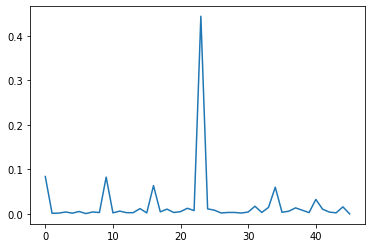

In [27]:
plt.plot(model.feature_importances_)

In [28]:
model.feature_importances_
#2 features have a lot of influence (WAKULLA CONDUIT WELL@WEST OF HWY 61) [Duh] and (NWFWMD GW-12F (RIVERSPRINGS MS)/S820)


array([0.08408652, 0.00141603, 0.0018036 , 0.004339  , 0.00169277,
       0.00542141, 0.00079892, 0.00437129, 0.00309779, 0.08265511,
       0.00237942, 0.00626415, 0.00283573, 0.00277065, 0.01192997,
       0.00234604, 0.06362717, 0.00465372, 0.01076234, 0.00315602,
       0.00516991, 0.01267129, 0.00754617, 0.44431729, 0.01135663,
       0.00836684, 0.00206513, 0.00330088, 0.00326302, 0.00195545,
       0.0043263 , 0.01723747, 0.00330963, 0.01457157, 0.0599813 ,
       0.00366589, 0.00607631, 0.01358274, 0.00829504, 0.00299256,
       0.03257117, 0.01060641, 0.00408667, 0.00238265, 0.01589402,
       0.        ])

In [29]:
pd.DataFrame(pca.components_, columns = X.columns)

NameError: name 'pca' is not defined

In [30]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = X.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
for i in most_important_names:
    print(NameKey[i])
    
print(most_important)

NameError: name 'pca' is not defined

In [31]:
#Run again but only with Surface Water
X = pd.read_csv("../data/processed/gw_stage.CSV",
                    parse_dates=['Datetime'],
                    index_col=['Datetime'])
y = pd.read_csv("../data/processed/spring.CSV",
                    parse_dates=['datetime'],
                    index_col=['datetime'])
X.drop(X.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
                  24,25,26,27,28,29 ]], axis=1, inplace=True)
X.shape

(1101, 46)

In [32]:
mm=MinMaxScaler()
ss=StandardScaler()
X_ss=ss.fit_transform(X)
y_mm=mm.fit_transform(y)

X_train=X_ss[:880,:]
X_test=X_ss[880:,:]
y_train=y_mm[:880,0]
y_test=y_mm[880:,0]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(880, 46)
(880,)
(221, 46)
(221,)


In [33]:
#Test of RF model
model2=RandomForestRegressor()
model2.fit(X_train, y_train)

a=model2.score(X_train, y_train)
print('Train Ser R2: ', a)
b=model2.score(X_test, y_test)
print('Test Set R2: ',b )

Train Ser R2:  0.9896525959986656
Test Set R2:  -0.2257807259923008


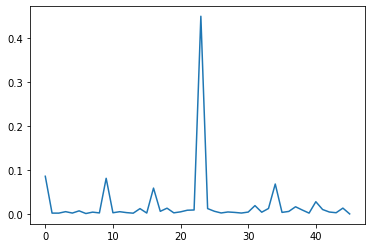

In [34]:
plt.plot(model2.feature_importances_)

In [35]:
model2.feature_importances_


#BLACK CREEK @ CR 267 Has most importance, Lsot Creek, ake Iammonia East has higher importance than expected

array([0.08551602, 0.00181702, 0.00179446, 0.00511341, 0.0019292 ,
       0.00696726, 0.00089801, 0.00404546, 0.0022587 , 0.08091399,
       0.0026342 , 0.0050348 , 0.00298264, 0.00166528, 0.01202346,
       0.00199748, 0.05864658, 0.00588577, 0.01303543, 0.00245525,
       0.0047098 , 0.00839739, 0.00894405, 0.4491215 , 0.01212981,
       0.00600791, 0.00215051, 0.00441341, 0.00341684, 0.00198919,
       0.00419714, 0.01885727, 0.00387517, 0.01233929, 0.0679173 ,
       0.00348479, 0.0056471 , 0.0162401 , 0.00883255, 0.00182627,
       0.02771918, 0.00998955, 0.00429583, 0.00269963, 0.01318397,
       0.        ])

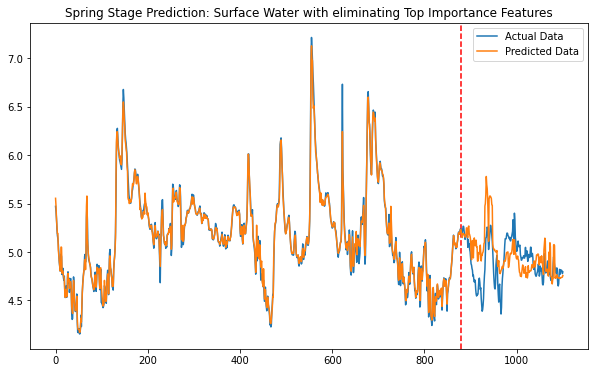

In [36]:
predict=model2.predict(X_ss)
z=np.reshape(predict,(1101,1))

predicted_stage=mm.inverse_transform(z)
actual_stage=mm.inverse_transform(y_mm)

plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=880, c='r', linestyle='--') #size of the training set

plt.plot(actual_stage, label='Actual Data') #actual plot
plt.plot(predicted_stage, label='Predicted Data') #predicted plot
plt.title('Spring Stage Prediction: Surface Water with eliminating Top Importance Features')
plt.legend()
plt.show() 

In [37]:
predict=model.predict(X_test)
z=np.reshape(predict,(221,1))

predictTest=mm.inverse_transform(z)
y_test=y_test.reshape(221,1)
actualTest=mm.inverse_transform(y_test)


rmse=mse(actualTest, predictTest)**0.5
rmse


0.24640662871041286